In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


os.makedirs('plots', exist_ok=True)

In [98]:
path = os.path.join('test_data', 'opt_init', 'grad.log')
with open (path, 'r') as f:
    lines = f.readlines()
    dE_data_init = [float(line.split('dE= ')[1].split(' ')[0]) for line in lines if 'dE= ' in line]
    grad_data_init = [float(line.split('g=')[1]) for line in lines if 'g=' in line]
print(f'Gradients and dE for Base SVD\n Gradients: {[f'{x:.4f}'for x in grad_data_init]}\n dE: {[f"{x:.4f}" for x in dE_data_init]}')


Gradients and dE for Base SVD
 Gradients: ['1.6123', '1.0456']
 dE: ['-0.0033', '0.0001']


In [99]:
method_names = ['opt_all_shifting', 'opt_regularization', 'opt_scaling', 'opt_tikhonov_nocut',
                 'opt_tikhonov_withcut', 'opt_fft_withcut']
grad_data, dE_data = {}, {}
for method_name in method_names:
    path = os.path.join('test_data', method_name, 'grad.log')
    with open (path, 'r') as f:
        lines = f.readlines()
        dE_data[method_name] = [float(line.split('dE= ')[1].split(' ')[0]) for line in lines if 'dE= ' in line]
        grad_data[method_name] = [float(line.split('g=')[1]) for line in lines if 'g=' in line]
label_descriptions = {
    'opt_all_shifting': 'All Shifting',
    'opt_regularization': 'Regularization',
    'opt_scaling': 'Scaling',
    'opt_tikhonov_nocut': 'Tikhonov No Cut-off',
    'opt_tikhonov_withcut': 'Tikhonov With Cut-off',
    'opt_fft_withcut': 'FFT With Cut-off'
}

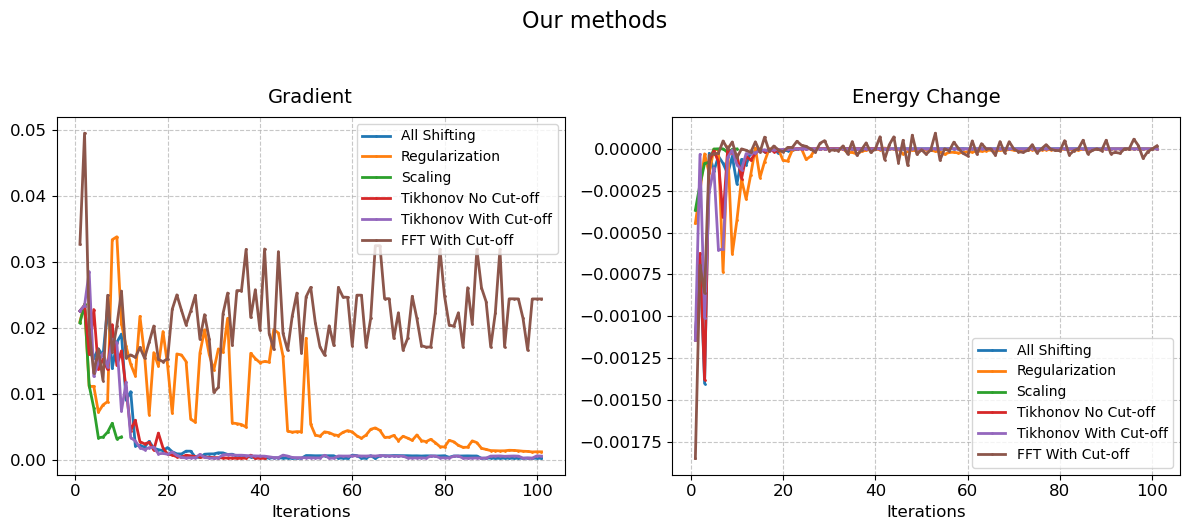

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for method_name in method_names:
    x1 = list(range(1, 1 + len(grad_data[method_name])))
    x2 = list(range(1, 1 + len(dE_data[method_name])))
    ax1.plot(
        x1,
        grad_data[method_name],
        marker='o',
        linewidth=2,
        markersize=1,
        label=label_descriptions[method_name]
    )
    ax2.plot(
        x2,
        dE_data[method_name],
        marker='o',
        linewidth=2,
        markersize=1,
        label=label_descriptions[method_name]
    )

ax1.set_title('Gradient', fontsize=14, pad=10)
ax1.set_xlabel('Iterations', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

ax2.set_title('Energy Change', fontsize=14, pad=10)
ax2.set_xlabel('Iterations', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

fig.suptitle('Our methods', fontsize=16, y=1.05)

plt.tight_layout()
plt.savefig('plots/our_methods.png')
plt.show()


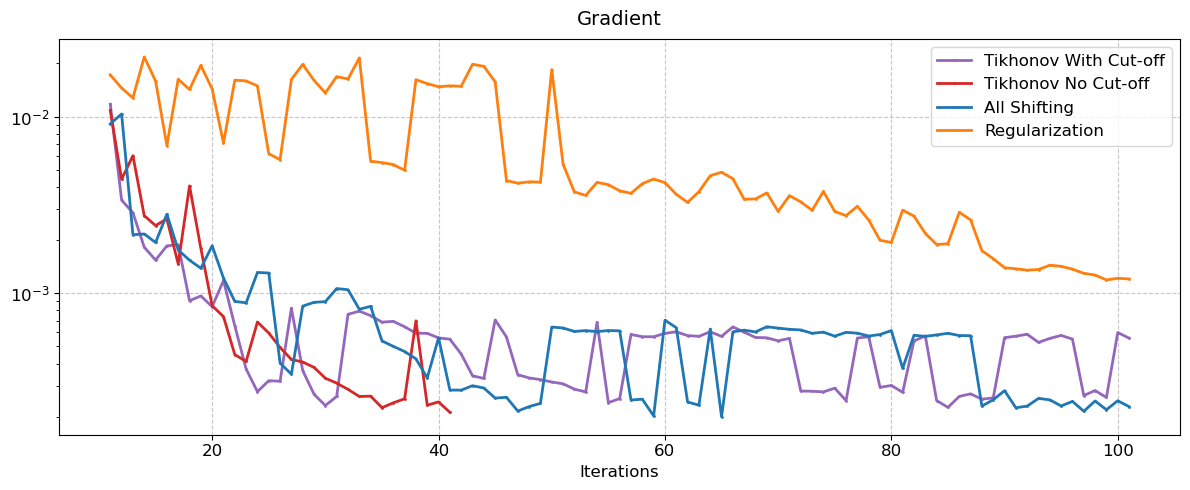

In [101]:
fig, ax = plt.subplots(figsize=(12, 5))
selected_methods = ['opt_tikhonov_withcut', 'opt_tikhonov_nocut', 'opt_all_shifting', 'opt_regularization']

colors = {method: f'C{i}' for i, method in enumerate(method_names)}

x_values = list(range(11, 1+len(grad_data[selected_methods[0]])))

for method_name in selected_methods:
    ax.plot(list(range(11, 1+len(grad_data[method_name]))), grad_data[method_name][10:], marker='o', linewidth=2, markersize=1,
            label=label_descriptions[method_name], color=colors[method_name])

ax.set_title('Gradient', fontsize=14, pad=10)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_yscale('log')
ax.set_xlabel('Iterations', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('plots/selected_methods.png')
plt.show()